In [2]:
# VGG-16 Code for Final Project IE 590
# Keras implementation of VGG16
# Kristiaan Hector | Varun Aggarwal | Aaron Etienne

# First we need to import the appropriate libraries
#--------------------------------------------------------------------------------------------------
# This ensures compatibility
# import tensorflow.python.keras import backend as K
import tensorflow.keras 

# Import libraries for reading and processing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD



# Import the VGG-16 model from keras
from tensorflow.python.keras.applications.vgg16 import VGG16, preprocess_input

# import numpy
import numpy as np
#--------------------------------------------------------------------------------------------------

In [3]:
# Next, we need to define a few important things

DATASET_PATH  = './weed_data'                                       # set the path to the data set
IMAGE_SIZE    =  (224,224)                                            # set the image size
NUM_CLASSES   = 4                                                     # we have 4 different classes 
BATCH_SIZE    = 4                                                 # set the batch size
NUM_EPOCHS    = 25                                                    # set the number of epochs
WEIGHTS_FINAL = 'model-vgg16-final_aanis.h5'                                # save weights after training

In [4]:
# Now we need to create our training and validation batches

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# define the training data
train_batches = train_datagen.flow_from_directory(DATASET_PATH+'/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)
                                                  
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# now define the validation data
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH+'/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 274 images belonging to 4 classes.
Found 93 images belonging to 4 classes.


In [5]:
# Next we want to show the classes
print('****************')
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx,cls))
print('****************')

#--------------------------------------------------------------------------------------------------

****************
Class #0 = cocklebur
Class #1 = foxtail
Class #2 = pigweed
Class #3 = ragweed
****************


In [6]:
# Next, let's set up the VGG16 model
model = VGG16(weights=None,
              input_tensor=None,
              input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
              pooling='max',
              classes=NUM_CLASSES)

In [7]:
# Next, ensure that all of the layers in our model are trainable
for layer in model.layers:
    layer.trainable = True

In [8]:
# After this, set up the optimizer for the model
# Here, I chose to use Adam...
# model.compile(optimizer=Adam(lr=1e-5),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Make a usable summary of the model
print(model.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
# Here, let's train the model
hist = model.fit_generator(train_batches,
                    steps_per_epoch = train_batches.samples // BATCH_SIZE,
                    validation_data = valid_batches,
                    validation_steps = valid_batches.samples //BATCH_SIZE,
                    epochs = NUM_EPOCHS)

Epoch 1/25
68/68 [==============================] - 25s 375ms/step - loss: 1.2131 - accuracy: 0.4556 - val_loss: 1.1800 - val_accuracy: 0.3804
Epoch 2/25
68/68 [==============================] - 26s 385ms/step - loss: 1.0658 - accuracy: 0.5407 - val_loss: 1.0539 - val_accuracy: 0.5761
Epoch 3/25
68/68 [==============================] - 27s 392ms/step - loss: 0.9673 - accuracy: 0.6000 - val_loss: 1.0529 - val_accuracy: 0.6087
Epoch 4/25
68/68 [==============================] - 27s 398ms/step - loss: 0.8325 - accuracy: 0.6370 - val_loss: 0.8442 - val_accuracy: 0.7609
Epoch 5/25
68/68 [==============================] - 27s 393ms/step - loss: 0.6364 - accuracy: 0.7741 - val_loss: 0.6550 - val_accuracy: 0.7609
Epoch 6/25
68/68 [==============================] - 26s 381ms/step - loss: 0.4884 - accuracy: 0.8333 - val_loss: 0.6838 - val_accuracy: 0.8587
Epoch 7/25
68/68 [==============================] - 27s 394ms/step - loss: 0.4401 - accuracy: 0.8556 - val_loss: 0.5190 - val_accuracy: 0.8370

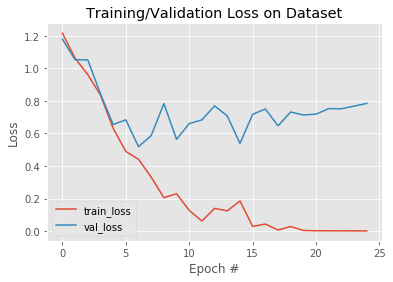

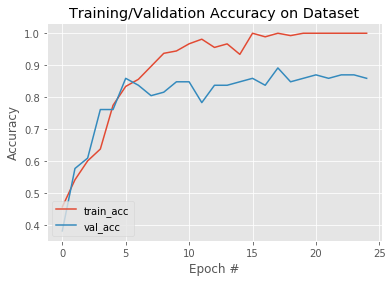

In [12]:
import matplotlib.pyplot as plt
N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [13]:
# Now let's add some data augmentation to our images to see if we can combat this overfitting
# problem...

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# define the training data
train_batches = train_datagen.flow_from_directory(DATASET_PATH+'/train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)
                                                  
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# now define the validation data
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH+'/val',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 274 images belonging to 4 classes.
Found 93 images belonging to 4 classes.


In [17]:
# create a new VGG model
# vgg16 model set up
model2 = VGG16(weights=None,
              input_tensor=None,
              input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3),
              pooling='max',
              classes=NUM_CLASSES)

In [18]:
# Next, we need to ensure that all of the layers in our model are trainable
for layer in model2.layers:
    layer.trainable = True

In [19]:
# Now we need to set up the optimizer for the model
# Let's use Adam...
# model2.compile(optimizer=Adam(lr=1e-5),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

model2.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Make a usable summary of our model's training and validation
print(model2.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
# Finally, let's train the model
hist2 = model2.fit_generator(train_batches,
                     steps_per_epoch = train_batches.samples // BATCH_SIZE,
                     validation_data = valid_batches,
                     validation_steps = valid_batches.samples //BATCH_SIZE,
                     epochs = NUM_EPOCHS)

Epoch 1/25
68/68 [==============================] - 27s 396ms/step - loss: 1.2349 - accuracy: 0.3815 - val_loss: 1.1846 - val_accuracy: 0.4130
Epoch 2/25
68/68 [==============================] - 29s 425ms/step - loss: 1.1884 - accuracy: 0.4185 - val_loss: 1.1638 - val_accuracy: 0.4457
Epoch 3/25
68/68 [==============================] - 29s 424ms/step - loss: 1.1630 - accuracy: 0.4556 - val_loss: 1.1160 - val_accuracy: 0.5870
Epoch 4/25
68/68 [==============================] - 31s 463ms/step - loss: 1.1310 - accuracy: 0.5074 - val_loss: 1.1013 - val_accuracy: 0.4457
Epoch 5/25
68/68 [==============================] - 31s 450ms/step - loss: 1.0538 - accuracy: 0.5704 - val_loss: 0.9100 - val_accuracy: 0.7065
Epoch 6/25
68/68 [==============================] - 30s 443ms/step - loss: 1.0346 - accuracy: 0.5444 - val_loss: 0.8654 - val_accuracy: 0.7065
Epoch 7/25
68/68 [==============================] - 27s 396ms/step - loss: 0.9052 - accuracy: 0.6444 - val_loss: 0.9779 - val_accuracy: 0.5652

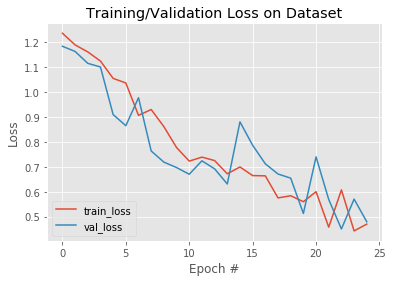

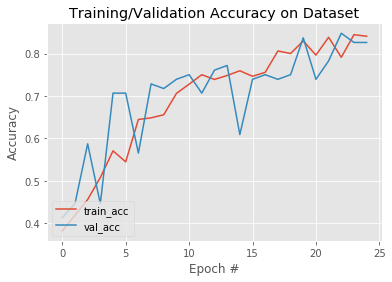

In [21]:
import matplotlib.pyplot as plt
N=NUM_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist2.history["val_loss"], label="val_loss")

plt.title("Training/Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig("plot_loss.png")

plt.figure()
plt.plot(np.arange(0, N), hist2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist2.history["val_accuracy"], label="val_acc")

plt.title("Training/Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [22]:
# Now we need to test!!!
# test model

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_batches = test_datagen.flow_from_directory(DATASET_PATH + '/test',
                                                target_size=IMAGE_SIZE,
                                                interpolation='bicubic',
                                                class_mode='categorical',
                                                shuffle=False,
                                                batch_size=1)

out = model.evaluate_generator(test_batches, use_multiprocessing=True)
print(list(zip(model.metrics_names, out)))

Found 91 images belonging to 4 classes.
[('loss', 0.6094058903406661), ('accuracy', 0.9120879)]


In [23]:
test_batches.reset()
Y_pred = model.predict_generator(test_batches, use_multiprocessing=True)
# print(len(Y_pred))

In [24]:
y_pred = np.argmax(Y_pred, axis=1)

print('\n\n Classification Report\n')
target_names = list(test_batches.class_indices.keys())
print(classification_report(list(test_batches.classes), y_pred, target_names=target_names))



 Classification Report



NameError: name 'classification_report' is not defined

In [ ]:
print('\n\nConfusion Matrix\n')
cm = confusion_matrix(test_batches.classes, y_pred)

# row_sums = cm.sum(axis=1)
# cm = cm / row_sums

df_cm = pd.DataFrame(cm,
                     index=['cocklebur', 'foxtail', 'pigweed', 'ragweed'],
                     columns=['cocklebur', 'foxtail', 'pigweed', 'ragweed'])
# print(df_cm)

# flights = df_cm.pivot("month", "year", "passengers")

plt.figure(figsize=(5, 5))
plt.title('InceptionV3')
# sn.heatmap(df_cm, annot=True, fmt='0.0%', cbar=False)
sn.heatmap(df_cm, annot=True, cbar=False)

plt.savefig('IncepV3.png')